# Grid Search CV
It helps in checking for multiple tuning parameter value at once  
Plus it's faster than manually looping through

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

# Grid Search CV

> Helps in searching multiple parameters simultaneosly

> Example: Tuning **weights** and **k** for **KNNClassifier**  
> Or: Tuning **max_depth** and **min_samples_leaf** for a **DecisionTreeClassifier**

In [5]:
k_range = range(1, 31)
weights = ['uniform', 'distance']

param_grid = dict(n_neighbors = k_range, weights = weights)
param_grid

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}

In [6]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [7]:
# grid.cv_results_    # Verbose O/P

In [8]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [9]:
grid.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [10]:
grid.best_score_

0.97999999999999998

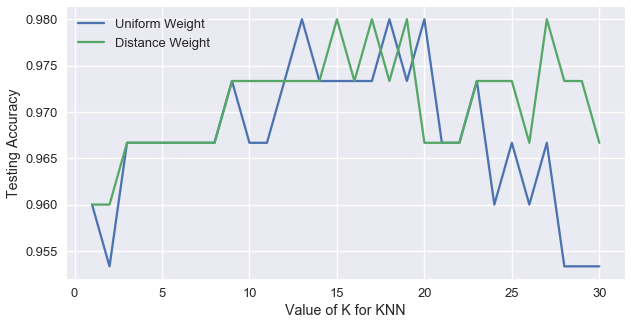

In [11]:
scores_uniform = grid.cv_results_['mean_test_score'][::2]
scores_distance = grid.cv_results_['mean_test_score'][1::2]

sns.set_context('talk')

plt.figure(figsize = (10, 5))
plt.plot(k_range, scores_uniform, label = 'Uniform Weight')
plt.plot(k_range, scores_distance, label = 'Distance Weight')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

# Using the best parameters before making final predictions

In [12]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
knn.fit(X, y)

knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array(['versicolor', 'versicolor'], dtype=object)

In [13]:
grid.predict([[3, 5, 4, 2], [5, 4, 3, 2]])    # grid has the best fitted Model by default

array(['versicolor', 'versicolor'], dtype=object)